In [ ]:
import pandas as pd
import numpy as np
import re
posts = pd.read_csv('posts.csv.gz', compression='gzip', error_bad_lines=False)

## Contagens

In [2]:
blogs = posts[['posts.csv']].groupby(['posts.csv'])
autores = posts[['authorID']].groupby(['authorID'])
print('Postagens: %i' %len(posts))
print('Blogs: %i' %len(blogs))
print('Autores: %i' %len(autores))

Postagens: 1346851
Blogs: 144043
Autores: 154787


## Ano de Publicação

In [15]:
posts['date'] = pd.to_datetime(posts['published'], errors='coerce')
posts['year'] = posts['date'].dt.year

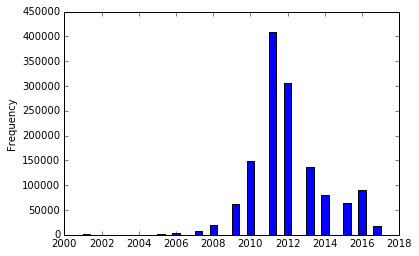

In [35]:
%matplotlib inline
year = posts['year']
year = year[year > 2000]
year = year[year < 2018]
year.plot.hist(bins=40)

## Médias

In [3]:
def titleCount(x): 
    try:
        return len(re.findall(r'\w+', x['title']))
    except:
        return 0
    
def contentCount(x): 
    try:
        return len(re.findall(r'\w+', x['content']))
    except:
        return 0
    
posts['titleCount'] = posts.apply(titleCount,axis=1)
posts['contentCount'] = posts.apply(contentCount,axis=1)

In [4]:
np.mean(posts['titleCount'])

4.7375151371606803

In [5]:
np.mean(posts['contentCount'])

266.26412127250899

## Blogs mais densos

In [6]:
blogLen = posts[['posts.csv','contentCount']].groupby(['posts.csv']).agg(['count','mean'])
blogLen['contentCount'].sort_values('mean',ascending=False).head(10)

,count,mean
posts.csv,,
1717983962433433360,10,62653.500000
232972331800590580,10,37916.000000
1881440988280989601,10,31458.200000
2294213915837175178,10,26657.100000
1174338327883930016,10,23428.800000
1156787905348184307,9,22866.555556
1636456055145665266,4,21417.250000
2083400985795782700,10,20506.200000
2071340128786344525,10,19200.300000


## Posts mais comentados

In [7]:
posts[['title','replies']].sort_values('replies',ascending=False).head(10)

,title,replies
890163,Aprenda a usar o novo orkut!,1938
977139,TUDO SOBRE LÉO SANTANA,1232
890165,Miedi que eu respondo!,1135
890162,"Ely Kim, o melhor dançarino do mundo",1129
890169,O fim do Concurso Cultural,1108
229668,Urgente! Publicado o Edital do Concurso da PME...,1102
683601,Deixe seu Recado no meu Guestbook,695
577222,Sorteio,553
1248763,Need for Speed: The Run (ISO) [MediaFire] + Cr...,531
162172,FÓRUM 3 ANO 3 BIMESTRE 2015,528


## Posts Auto-Reflexivos

In [8]:
posts = posts.fillna('')
postsReflexivos = posts[posts['content'].str.contains("eu sinto|eu penso|eu acredito")]

print('Posts Reflexivos: %i' %len(postsReflexivos))
print('Total de Posts: %i' %len(posts))
print('Percentual: %f' %round(100 * len(postsReflexivos) / len(posts),3))

Posts Reflexivos: 13881
Total de Posts: 1346851
Percentual: 1.000000


## Blogs Auto-Reflexivos

In [9]:
groupReflex = postsReflexivos[['posts.csv','contentCount']].groupby(['posts.csv']).agg(['count','mean'])
groupReflex['contentCount'].sort_values('count',ascending=False).head(10)

,count,mean
posts.csv,,
1717983962433433360,8,77737.750000
242410630245328495,8,323.375000
2376002203817739048,7,196.000000
1978371034383717143,7,2226.000000
2299697280975917640,7,255.428571
118502485184438267,7,562.714286
1914884416849928157,6,635.500000
1588511966346755811,6,293.500000
2145477216130713949,6,789.500000
